In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/students-performance-in-exams/StudentsPerformance.csv


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt

In [3]:
df = pd.read_csv("/kaggle/input/students-performance-in-exams/StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
print (df.shape)

(1000, 8)


In [5]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [6]:
passmark = 40

In [7]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

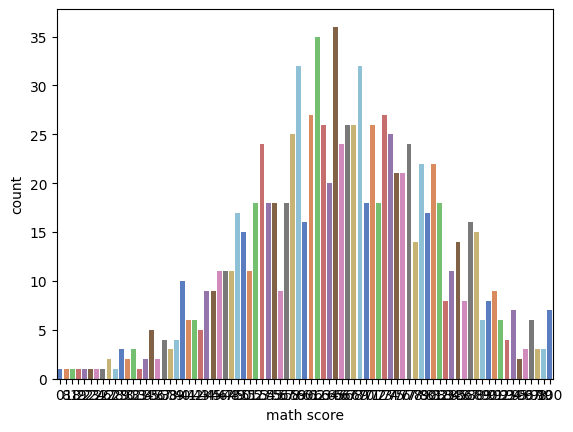

In [8]:
p = sns.countplot(x="math score",data=df,palette="muted" )


In [9]:
df['Math_PassStatus'] = np.where(df['math score']<passmark, 'F', 'P')
df.Math_PassStatus.value_counts()

Math_PassStatus
P    960
F     40
Name: count, dtype: int64

#Analysing Parental Education dependance on child's marks:

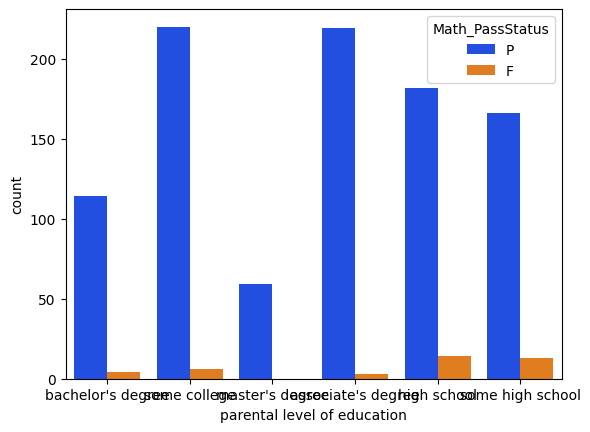

In [10]:
p = sns.countplot(x='parental level of education', data = df, hue='Math_PassStatus', palette='bright')


<Axes: xlabel='reading score', ylabel='count'>

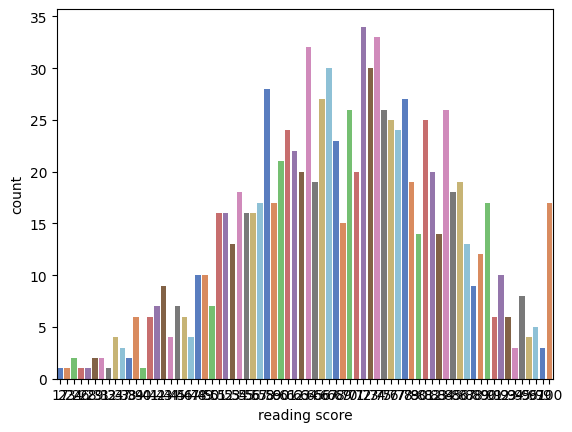

In [11]:
sns.countplot(x="reading score", data = df, palette="muted")


In [12]:
df['Reading_PassStatus'] = np.where(df['reading score']<passmark, 'F', 'P')
df.Reading_PassStatus.value_counts()

Reading_PassStatus
P    974
F     26
Name: count, dtype: int64

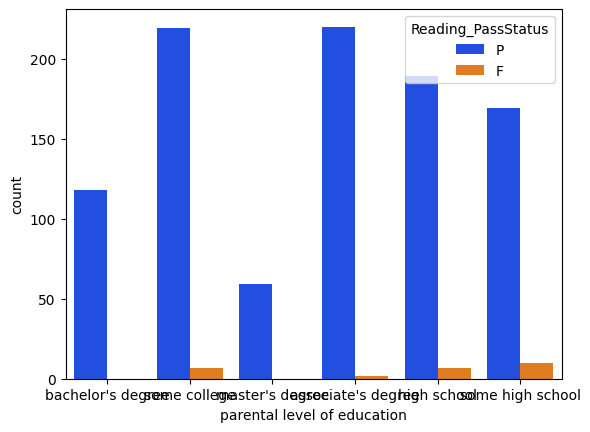

In [13]:
p = sns.countplot(x='parental level of education', data = df, hue='Reading_PassStatus', palette='bright')

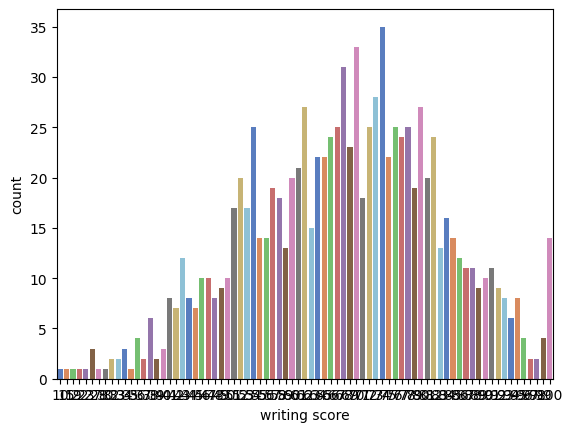

In [14]:
p = sns.countplot(x="writing score", data = df, palette="muted")

In [15]:
df['Writing_PassStatus'] = np.where(df['writing score']<passmark, 'F', 'P')
df.Writing_PassStatus.value_counts()

Writing_PassStatus
P    968
F     32
Name: count, dtype: int64

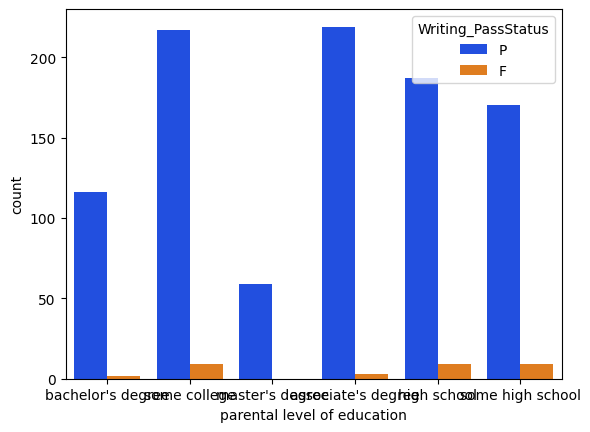

In [16]:
p = sns.countplot(x='parental level of education', data = df, hue='Writing_PassStatus', palette='bright')

Checking number of passed students 

In [17]:
df['OverAll_PassStatus'] = df.apply(lambda x : 'F' if x['Math_PassStatus'] == 'F' or 
                                    x['Reading_PassStatus'] == 'F' or x['Writing_PassStatus'] == 'F' else 'P', axis =1)

df.OverAll_PassStatus.value_counts()

OverAll_PassStatus
P    949
F     51
Name: count, dtype: int64

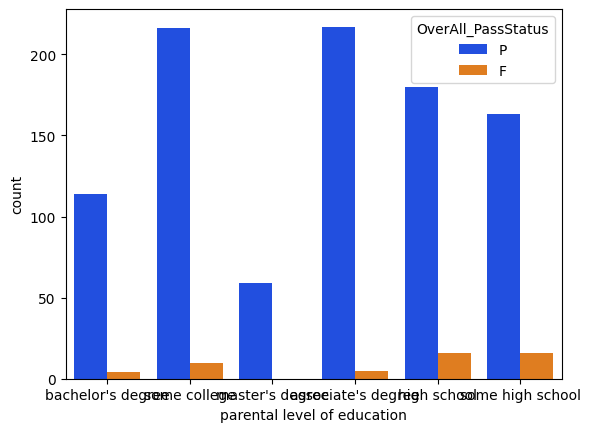

In [18]:
p = sns.countplot(x='parental level of education', data = df, hue='OverAll_PassStatus', palette='bright')


In [19]:
df['Total_Marks'] = df['math score']+df['reading score']+df['writing score']
df['Percentage'] = df['Total_Marks']/3

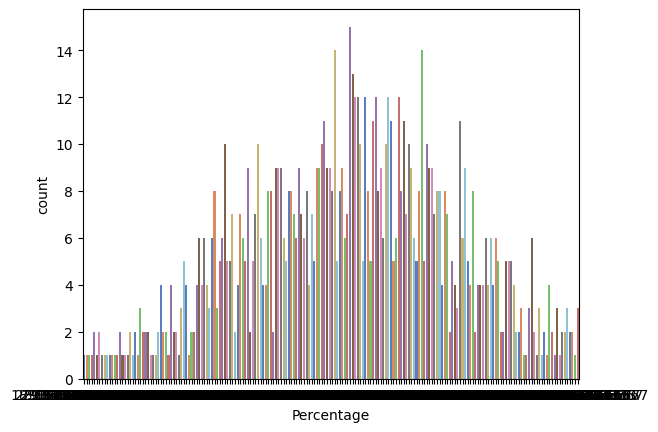

In [20]:
p = sns.countplot(x="Percentage", data = df, palette="muted")

In [21]:
def GetGrade(Percentage, OverAll_PassStatus):
    if ( OverAll_PassStatus == 'F'):
        return 'F'    
    if ( Percentage >= 80 ):
        return 'A'
    if ( Percentage >= 70):
        return 'B'
    if ( Percentage >= 60):
        return 'C'
    if ( Percentage >= 50):
        return 'D'
    if ( Percentage >= 40):
        return 'E'
    else: 
        return 'F'

df['Grade'] = df.apply(lambda x : GetGrade(x['Percentage'], x['OverAll_PassStatus']), axis=1)

df.Grade.value_counts()

Grade
B    261
C    256
A    198
D    178
E     56
F     51
Name: count, dtype: int64

<Axes: xlabel='Grade', ylabel='count'>

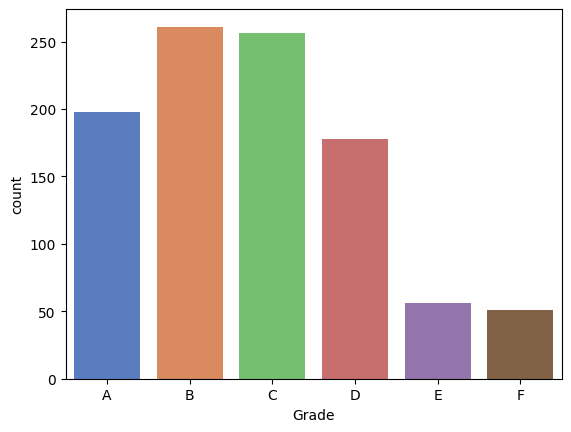

In [22]:
sns.countplot(x="Grade", data = df, order=['A','B','C','D','E','F'],  palette="muted")


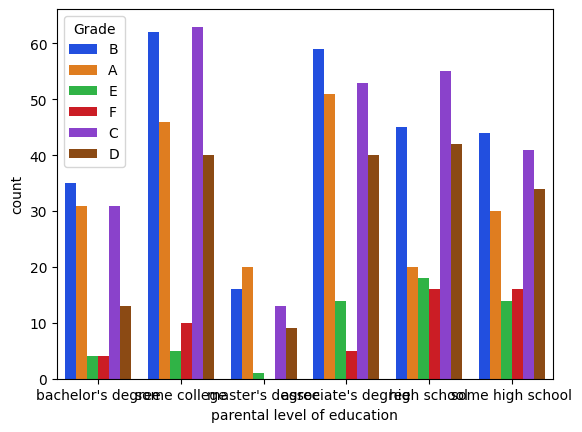

In [23]:
p = sns.countplot(x='parental level of education', data = df, hue='Grade', palette='bright')